# K-Mean Clustering

Following code is part of an assignment for the course IMSE 586 - Big Data Analytics and Visualization at the University of Michigan at Dearborn.

### Clustering - Wholesale Customers

Download the `wholesale.csv` file that is along with this notebook. See the data description in the cell below. Make sure you include this data file in your submission package. 

For all plots, make sure to choose a suitable aspect ratio of your figure (e.g., 15-by-5), include important elements (e.g., x & y labels, title) and make sure the plot is easy to read (e.g., larger fonts).

Read the data into a pandas dataframe. Do the normal checking on the dataframe, and then do the following.

1. Create a scatter plot that shows the relationship between the spendings in fresh and frozen products.


2. Conduct a clustering analysis using the $K$-means method. make sure to do the following:

    * Set the number of clusters to 5. 
    
    * Set the method so that the initial cluster centroids (i.e., seeds) are selected at random. (hint: check the documentation to see if this is the default setting)

    * Set the random state of the scikit-learn $K$-means function to 9.

    * Run the $K$-means algorithm exact **once**.
    
    * Create the same scatter plot as in Q1, but show the clustering solution using colors. 
    
    * Add the converged cluster centroids onto the above plot. Make sure to use a different marker type, so we can tell they are the centroids. 
    
    * How many iterations did it take to converge?
    
    * What is the inertia for this clustering solution?
    

3. Find the best value for the number of clusters $K$ using **the Elbow method**. For a specific $K$ value, run the $K$-means algorithm for 30 runs with different seeds. You can use the default method for initializing the seeds. Make sure to include the plot, your choice of $K$, and a brief description/discussion. 


4. Now find the best value for the number of clusters $K$ using **the Silhouette analysis**. Use the same $K$-means algorithm settings as in Q3. Similarly, make sure to include the plot, your choice of $K$, and a brief description/discussion. 


5. In practice, the choice of $K$ may also be constrained by the downstream usages of the clustering solution. In our case, let's assume the wholesale distributor is considering to launch a market campaign to target different types of customers. They want to have at least 3 forms of advertising, but cannot afford to do more than 8 forms. With this constraint, what is the best value of $K$? Try to find your answer using both the Elbow method and the Silhouette analysis. Make sure to include the plots, your choice of $K$, and a brief description/discussion. 


6. Continue with Q5, based on your choice of $K$, run the $K$-means algorithm again (with 30 runs, default method for seed initialization, and a random state of 10). Create a scatter plot similar to Q2 to show the clustering solution using colors. 


7. Based on the cluster solution in Q6, generate the profiles of the clusters by doing the following:

    * Create a line graph that shows the mean feature values (i.e., spending on fresh products, etc.) for each cluster (customer group). In the graph, each cluster would be one line, and the x-axis represents the different features, the y-axis is the standardized feature value.
    
    * Based on the line graph above, briefly describe the characteristics of each customer group. For example, the customers in group X buys the most fresh products and the least frozen product.
    
    * Create a dataframe that shows the centroids for each cluster. In the table, each row is one cluster centroid, and each column is a feature in the original measure (i.e., without standardization).  

### Data description:

This dataset contains customers of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

**Customer_ID**: Customer identification number

**Fresh**: Annual spending (m.u.) on fresh products

**Milk**: Annual spending (m.u.) on milk products 

**Grocery**: Annual spending (m.u.) on grocery products 

**Frozen**: Annual spending (m.u.) on frozen products

**Detergents_Paper**: Annual spending (m.u.) on detergents and paper products

**Delicassen**: Annual spending (m.u.) on delicatessen products

In [57]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv('data/wholesale.csv')
df.head()

,Customer_ID,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,3,13265,1196,4221,6404,507,1788
3,4,9413,8259,5126,666,1795,1451
4,5,12126,3199,6975,480,3140,545


In [59]:
df.dtypes

Customer_ID         int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [60]:
df.isnull().sum()

Customer_ID         0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

### 1. Create a scatter plot that shows the relationship between the spendings in fresh and frozen products.

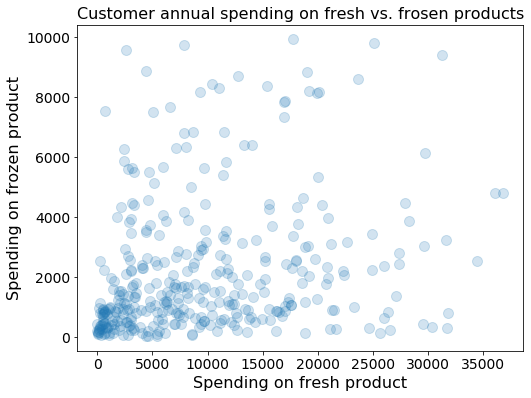

In [61]:
plt.figure(figsize = (8, 6))

plt.scatter(x = 'Fresh', y = 'Frozen', data = df, s = 100, alpha = .2)

plt.xlabel('Spending on fresh product', fontsize = 16)
plt.ylabel('Spending on frozen product', fontsize = 16)
plt.title('Customer annual spending on fresh vs. frosen products', fontsize = 16)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()

### 2. Conduct a clustering analysis using the $K$-means method. make sure to do the following:

* Set the number of clusters to 5. 
    
* Set the method so that the initial cluster centroids (i.e., seeds) are selected at random. (hint: check the documentation to see if this is the default setting)

* Set the random state of the scikit-learn $K$-means function to 9.

* Run the $K$-means algorithm exact **once**.
    
* Create the same scatter plot as in Q1, but show the clustering solution using colors. 
    
* Add the converged cluster centroids onto the above plot. Make sure to use a different marker type, so we can tell they are the centroids. 
    
* How many iterations did it take to converge?
    
* What is the inertia for this clustering solution?

In [62]:
# prepare the feature matrix for clustering

X = df.iloc[:, 1:]  # remove the first column (customer ID)
X.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,13265,1196,4221,6404,507,1788
3,9413,8259,5126,666,1795,1451
4,12126,3199,6975,480,3140,545


In [63]:
# standardize the features before clustering

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(data = X_scaled, columns = X.columns)
X_scaled.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.378990,1.599035,0.291196,-0.879522,0.251669,0.339428
1,-0.315428,1.644020,0.669829,-0.188821,0.497017,0.843539
2,0.452737,-0.872226,-0.338916,1.882388,-0.607245,0.857350
3,-0.023901,1.190955,-0.168182,-0.677845,-0.096732,0.469484
4,0.311800,-0.287127,0.180643,-0.760836,0.436374,-0.573268


In [64]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5, init = 'random', random_state = 9, n_init = 1)
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=5,
       n_init=1, n_jobs=None, precompute_distances='auto', random_state=9,
       tol=0.0001, verbose=0)

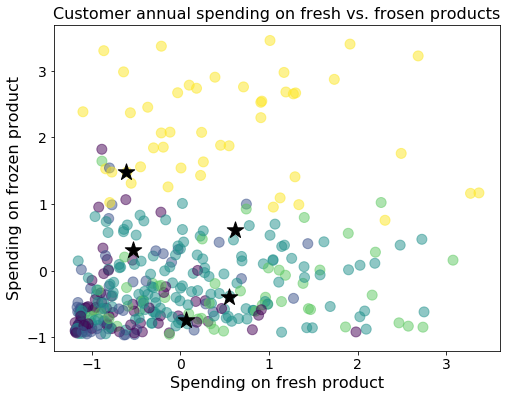

In [65]:
# plotting

plt.figure(figsize = (8, 6))

plt.scatter(x = 'Fresh', y = 'Frozen', data = X_scaled, c = kmeans.labels_, s = 100, alpha = .5)

# add the cluster centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c = 'black', marker = '*', s = 300)

plt.xlabel('Spending on fresh product', fontsize = 16)
plt.ylabel('Spending on frozen product', fontsize = 16)
plt.title('Customer annual spending on fresh vs. frosen products', fontsize = 16)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()

In [66]:
print('It takes ' + str(kmeans.n_iter_) + ' interations to converge.')
print('The inertia of this cluster solution is ' + str(kmeans.inertia_.round(1)) + '.')

It takes 14 interations to converge.
The inertia of this cluster solution is 884.0.


### 3. Find the best value for the number of clusters $K$ using **the Elbow method**. For a specific $K$ value, run the $K$-means algorithm for 30 runs with different seeds. You can use the default method for initializing the seeds. Make sure to include the plot, your choice of $K$, and a brief description/discussion. 

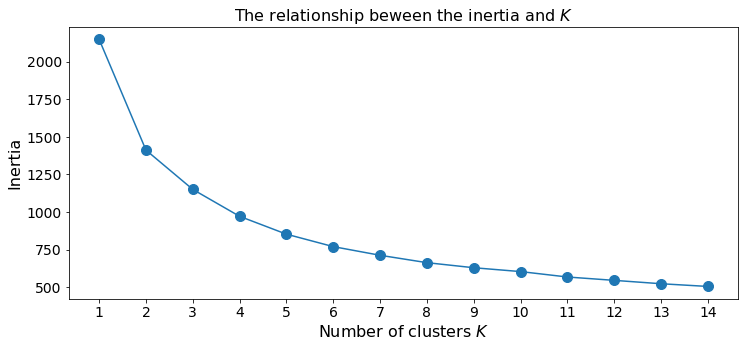

In [67]:
inertia = []

for k in range(1, 15):
    kmeans = KMeans(n_clusters = k, n_init = 30)
    kmeans.fit(X_scaled)
    inertia.append([k, kmeans.inertia_])

plt.figure(figsize = (12, 5))
plt.plot(pd.DataFrame(inertia)[0], pd.DataFrame(inertia)[1], marker = 'o', markersize = 10)

plt.xlabel('Number of clusters $K$', fontsize = 16)
plt.ylabel('Inertia', fontsize = 16)
plt.title('The relationship beween the inertia and $K$', fontsize = 16)

plt.xticks(np.arange(1, 15), fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()

### Based on the above plot, $K=2$ seems to be the "elbow point" by visual inspection. The best $K$ is 2 according to the Elbow method. 

### 4. Now find the best value for the number of clusters $K$ using **the Silhouette analysis**. Use the same $K$-means algorithm settings as in Q3. Similarly, make sure to include the plot, your choice of $K$, and a brief description/discussion. 

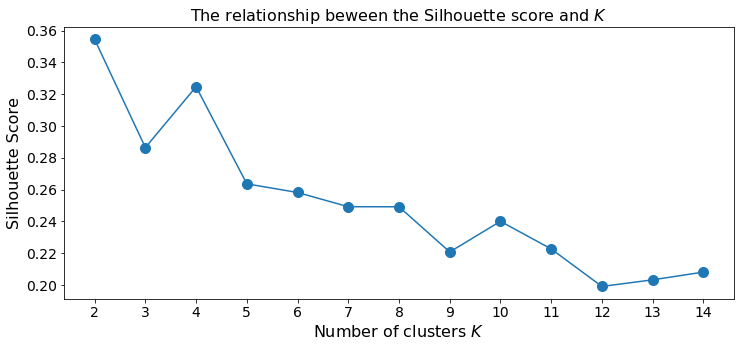

In [68]:
silhouette = []

from sklearn.metrics import silhouette_score

for k in range(2, 15):
    kmeans = KMeans(n_clusters = k, n_init = 30)
    kmeans.fit(X_scaled)
    silhouette.append([k, silhouette_score(X_scaled, kmeans.labels_)])
    
plt.figure(figsize = (12, 5))
plt.plot(pd.DataFrame(silhouette)[0], pd.DataFrame(silhouette)[1], marker = 'o', markersize = 10)

plt.xlabel('Number of clusters $K$', fontsize = 16)
plt.ylabel('Silhouette Score', fontsize = 16)
plt.title('The relationship beween the Silhouette score and $K$', fontsize = 16)

plt.xticks(np.arange(2, 15), fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()
    

### Based on the above plot, $K=2$ corresponds to the highest Silhouette score. The best $K$ is 2. This result is consistent with the result from the Elbow methods above. 

### 5. In practice, the choice of $K$ may also be constrained by the downstream usages of the clustering solution. In our case, let's assume the wholesale distributor is considering to launch a market campaign to target different types of customers. They want to have at least 3 forms of advertising, but cannot afford to do more than 8 forms. With this constraint, what is the best value of $K$? Try to find your answer using both the Elbow method and the Silhouette analysis. Make sure to include the plots, your choice of $K$, and a brief description/discussion. 

### The Elbow method

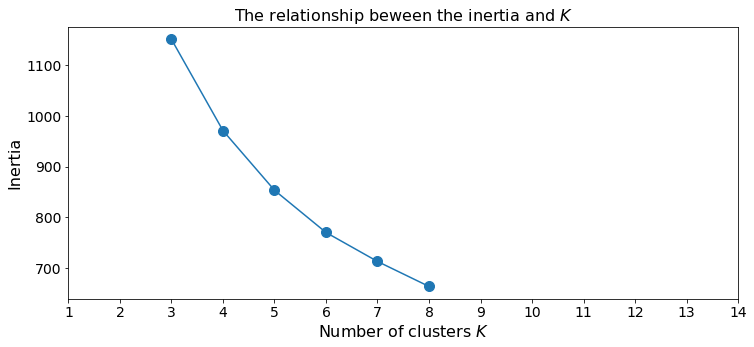

In [69]:
inertia = []

for k in range(3, 9):
    kmeans = KMeans(n_clusters = k, n_init = 30)
    kmeans.fit(X_scaled)
    inertia.append([k, kmeans.inertia_])

plt.figure(figsize = (12, 5))
plt.plot(pd.DataFrame(inertia)[0], pd.DataFrame(inertia)[1], marker = 'o', markersize = 10)

plt.xlabel('Number of clusters $K$', fontsize = 16)
plt.ylabel('Inertia', fontsize = 16)
plt.title('The relationship beween the inertia and $K$', fontsize = 16)

plt.xticks(np.arange(1, 15), fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()

### These is no clear "elbow" point in the above plot. We cannot find a good $K$ value using this method.  

### The Silhouette analysis

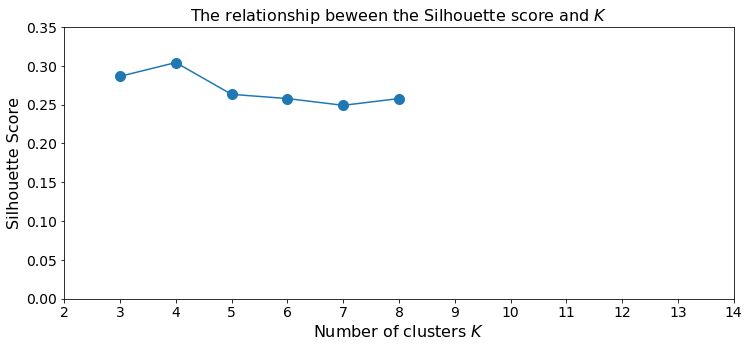

In [70]:
silhouette = []

from sklearn.metrics import silhouette_score

for k in range(3, 9):
    kmeans = KMeans(n_clusters = k, n_init = 30)
    kmeans.fit(X_scaled)
    silhouette.append([k, silhouette_score(X_scaled, kmeans.labels_)])
    
plt.figure(figsize = (12, 5))
plt.plot(pd.DataFrame(silhouette)[0], pd.DataFrame(silhouette)[1], marker = 'o', markersize = 10)

plt.xlabel('Number of clusters $K$', fontsize = 16)
plt.ylabel('Silhouette Score', fontsize = 16)
plt.title('The relationship beween the Silhouette score and $K$', fontsize = 16)

plt.xticks(np.arange(2, 15), fontsize = 14)
plt.yticks(np.arange(0, 0.4, 0.05), fontsize = 14)

plt.show()

### Based on the above plot, $K=4$ corresponds to the highest Silhouette score. The best $K$ is 4 according to this method. 

### 6. Continue with Q5, based on your choice of $K$, run the $K$-means algorithm again (with 30 runs, default method for seed initialization, and a random state of 10). Create a scatter plot similar to Q2 to show the clustering solution using colors. 

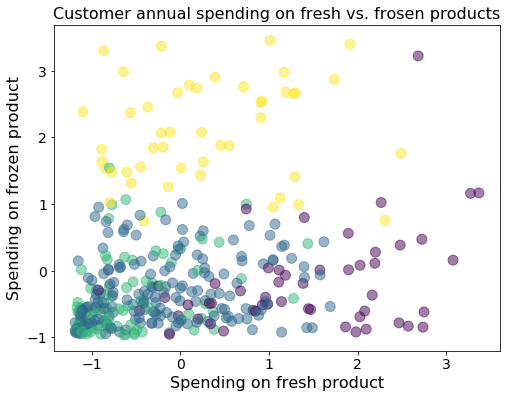

In [71]:
kmeans = KMeans(n_clusters = 4, n_init = 30, random_state = 10)

kmeans.fit(X_scaled)


plt.figure(figsize=(8, 6))

plt.scatter(x = 'Fresh', y = 'Frozen', data = X_scaled, c = kmeans.labels_, s = 100, alpha = .5)

plt.xlabel('Spending on fresh product', fontsize = 16)
plt.ylabel('Spending on frozen product', fontsize = 16)
plt.title('Customer annual spending on fresh vs. frosen products', fontsize = 16)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()

### 7. Based on the cluster solution in Q6, generate the profiles of the clusters by doing the following:

* Create a line graph that shows the mean feature values (i.e., spending on fresh products, etc.) for each cluster (customer group). In the graph, each cluster would be one line, and the x-axis represents the different features, the y-axis is the standardized feature value.
    
* Based on the line graph above, briefly describe the characteristics of each customer group. For example, the customers in group X buys the most fresh products and the least frozen product.
    
* Create a dataframe that shows the centroids for each cluster. In the table, each row is one cluster centroid, and each column is a feature in the original measure (i.e., without standardization). 

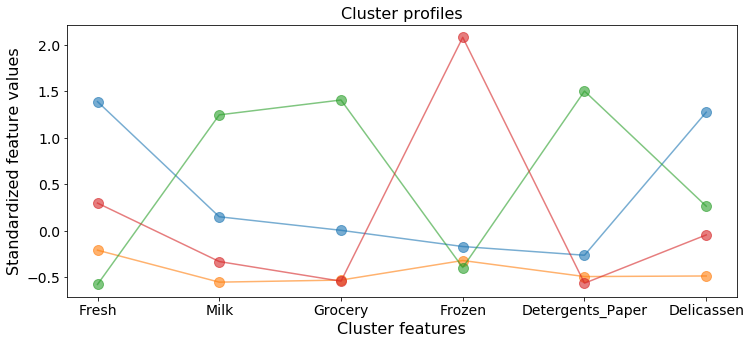

In [72]:
# profiling the clusters
plt.figure(figsize=(12, 5))
plt.plot(np.transpose(kmeans.cluster_centers_), marker = 'o', markersize = 10, alpha = .6)
plt.xticks(np.arange(6), X.columns)

plt.xlabel('Cluster features', fontsize = 16)
plt.ylabel('Standardized feature values', fontsize = 16)
plt.title('Cluster profiles', fontsize = 16)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()

### The descriptions should be something along these lines:

### Blue cluster: Customers in this group buy the most fresh product and deli product. 

### Red cluster: Customers in this group buy the most frozen product (by a large margin), second most for fresh product.

### Orange cluster: Customers in this group don't spend much in any of the product categories. 

### Green cluster: Customers in this group buy the most milk, crocery, and detergents and papers (all by a large margin), and least fresh product and frozen product. 



In [73]:
# inverse the standardized cluster centers back to the original measures and save it in a pandas dataframe
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns = X.columns)
centroids.round(1)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,20846.4,4701.5,6049.8,1807.8,1377.7,2153.1
1,7927.1,2293.1,3211.3,1470.6,798.6,621.4
2,4947.2,8456.1,13483.5,1299.8,5834.8,1273.8
3,12023.6,3052.1,3147.2,6852.8,617.8,1005.5
